In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## import news csv

In [22]:
news = pd.read_csv('csv_files/news/migr_news_year_percent.csv')

In [23]:
news

,financial_year,percentage,year_only,t,const
0,2002-07-01,0.455606,2002.0,1,1
1,2003-07-01,0.498948,2003.0,2,1
2,2004-07-01,0.395300,2004.0,3,1
3,2005-07-01,0.470755,2005.0,4,1
4,2006-07-01,0.360467,2006.0,5,1
5,2007-07-01,0.240773,2007.0,6,1
6,2008-07-01,0.311291,2008.0,7,1
7,2009-07-01,0.577675,2009.0,8,1
8,2010-07-01,0.713295,2010.0,9,1
9,2011-07-01,0.527310,2011.0,10,1


In [24]:
news.dtypes

financial_year     object
percentage        float64
year_only         float64
t                   int64
const               int64
dtype: object

In [25]:
news['financial_year'] = pd.to_datetime(news['financial_year'])

In [26]:
news.dtypes

financial_year    datetime64[ns]
percentage               float64
year_only                float64
t                          int64
const                      int64
dtype: object

In [27]:
#df.drop(columns=['B', 'C'])
#news = news.drop(columns = ['year_only', 't', 'const'])
news_perc = news[['percentage', 'financial_year']]

In [28]:
news_perc.dtypes

percentage               float64
financial_year    datetime64[ns]
dtype: object

## Import total immigrants csv

In [3]:
immigrants = pd.read_csv('csv_files/immigration_stats/total_immigrants_year.csv')

In [4]:
immigrants

,financial_year,total_immigrants,year_only,t,const
0,2002-07-01,125870.0,2002,1,1
1,2003-07-01,148431.0,2003,2,1
2,2004-07-01,162801.0,2004,3,1
3,2005-07-01,174782.0,2005,4,1
4,2006-07-01,190864.0,2006,5,1
5,2007-07-01,203238.0,2007,6,1
6,2008-07-01,219547.0,2008,7,1
7,2009-07-01,203647.0,2009,8,1
8,2010-07-01,207855.0,2010,9,1
9,2011-07-01,237371.0,2011,10,1


In [5]:
immigrants.dtypes

financial_year       object
total_immigrants    float64
year_only             int64
t                     int64
const                 int64
dtype: object

In [6]:
immigrants['financial_year'] = pd.to_datetime(immigrants['financial_year'])

In [7]:
immigrants.dtypes

financial_year      datetime64[ns]
total_immigrants           float64
year_only                    int64
t                            int64
const                        int64
dtype: object

## Merge immigration stats & news

In [41]:
immigr_merge = immigrants.merge(news_perc, left_on='financial_year', right_on='financial_year', copy = False)

In [42]:
immigr_merge.dtypes

financial_year      datetime64[ns]
total_immigrants           float64
year_only                    int64
t                            int64
const                        int64
percentage                 float64
dtype: object

In [43]:
immigr_merge

,financial_year,total_immigrants,year_only,t,const,percentage
0,2002-07-01,125870.0,2002,1,1,0.455606
1,2003-07-01,148431.0,2003,2,1,0.498948
2,2004-07-01,162801.0,2004,3,1,0.395300
3,2005-07-01,174782.0,2005,4,1,0.470755
4,2006-07-01,190864.0,2006,5,1,0.360467
5,2007-07-01,203238.0,2007,6,1,0.240773
6,2008-07-01,219547.0,2008,7,1,0.311291
7,2009-07-01,203647.0,2009,8,1,0.577675
8,2010-07-01,207855.0,2010,9,1,0.713295
9,2011-07-01,237371.0,2011,10,1,0.527310


In [44]:
immigr_merge = immigr_merge.rename(columns={'percentage': 'migr_news_perc'})

In [45]:
immigr_merge.columns

Index(['financial_year', 'total_immigrants', 'year_only', 't', 'const',
       'migr_news_perc'],
      dtype='object')

In [46]:
immigr_merge = immigr_merge[['financial_year', 'total_immigrants', 
                 'migr_news_perc', 'year_only', 't', 'const']]

In [47]:
immigr_merge

,financial_year,total_immigrants,migr_news_perc,year_only,t,const
0,2002-07-01,125870.0,0.455606,2002,1,1
1,2003-07-01,148431.0,0.498948,2003,2,1
2,2004-07-01,162801.0,0.395300,2004,3,1
3,2005-07-01,174782.0,0.470755,2005,4,1
4,2006-07-01,190864.0,0.360467,2006,5,1
5,2007-07-01,203238.0,0.240773,2007,6,1
6,2008-07-01,219547.0,0.311291,2008,7,1
7,2009-07-01,203647.0,0.577675,2009,8,1
8,2010-07-01,207855.0,0.713295,2010,9,1
9,2011-07-01,237371.0,0.527310,2011,10,1


## import humanitarian csv

In [15]:
humanitarian = pd.read_csv('csv_files/immigration_stats/humanitarian_data_clean.csv')

In [16]:
humanitarian.dtypes

Year                             object
Refugee                         float64
Special Humanitarian Program    float64
Special Assistance Category     float64
Onshore                         float64
Total                           float64
year_only                         int64
dtype: object

In [17]:
humanitarian['Year'] = pd.to_datetime(humanitarian['Year'])

In [18]:
humanitarian.dtypes

Year                            datetime64[ns]
Refugee                                float64
Special Humanitarian Program           float64
Special Assistance Category            float64
Onshore                                float64
Total                                  float64
year_only                                int64
dtype: object

In [19]:
humanitarian

,Year,Refugee,Special Humanitarian Program,Special Assistance Category,Onshore,Total,year_only
0,2002-07-01,3.996,7.212,0.0,911.000,12.119,2002
1,2003-07-01,3.851,8.912,0.0,784.000,13.547,2003
2,2004-07-01,5.289,6.684,0.0,952.000,12.925,2004
3,2005-07-01,5.699,6.739,0.0,1.247,13.685,2005
4,2006-07-01,5.924,5.157,0.0,1.707,12.788,2006
5,2007-07-01,5.951,4.721,0.0,1.932,12.604,2007
6,2008-07-01,6.446,4.471,0.0,2.495,13.412,2008
7,2009-07-01,5.988,3.234,0.0,4.535,13.757,2009
8,2010-07-01,5.998,2.973,0.0,4.828,13.799,2010
9,2011-07-01,6.004,714.000,0.0,7.041,13.759,2011


## Merge humanitarian stats & news

In [29]:
humanit_merge = humanitarian.merge(news_perc, 
                                   left_on='Year', 
                                   right_on='financial_year', copy = False)


In [30]:
humanit_merge

,Year,Refugee,Special Humanitarian Program,Special Assistance Category,Onshore,Total,year_only,percentage,financial_year
0,2002-07-01,3.996,7.212,0.0,911.000,12.119,2002,0.455606,2002-07-01
1,2003-07-01,3.851,8.912,0.0,784.000,13.547,2003,0.498948,2003-07-01
2,2004-07-01,5.289,6.684,0.0,952.000,12.925,2004,0.395300,2004-07-01
3,2005-07-01,5.699,6.739,0.0,1.247,13.685,2005,0.470755,2005-07-01
4,2006-07-01,5.924,5.157,0.0,1.707,12.788,2006,0.360467,2006-07-01
5,2007-07-01,5.951,4.721,0.0,1.932,12.604,2007,0.240773,2007-07-01
6,2008-07-01,6.446,4.471,0.0,2.495,13.412,2008,0.311291,2008-07-01
7,2009-07-01,5.988,3.234,0.0,4.535,13.757,2009,0.577675,2009-07-01
8,2010-07-01,5.998,2.973,0.0,4.828,13.799,2010,0.713295,2010-07-01
9,2011-07-01,6.004,714.000,0.0,7.041,13.759,2011,0.527310,2011-07-01


## Import subregion csv

In [33]:
subregion = pd.read_csv('csv_files/immigration_stats/immigrants_subregion_year.csv')

In [34]:
subregion

,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t,total_immigrants
0,2002-07-01,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1,125870.0
1,2003-07-01,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2,148431.0
2,2004-07-01,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3,162801.0
3,2005-07-01,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4,174782.0
4,2006-07-01,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5,190864.0
5,2007-07-01,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6,203238.0
6,2008-07-01,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7,219547.0
7,2009-07-01,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8,203647.0
8,2010-07-01,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9,207855.0
9,2011-07-01,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10,237371.0


In [35]:
subregion.dtypes

financial_year                                     object
Central Asia                                      float64
North Africa & the Middle East                    float64
North East Asia                                   float64
North-West Europe                                 float64
Northern America                                  float64
Oceania                                           float64
South America, Central America & the Caribbean    float64
South East Asia                                   float64
Southern Asia                                     float64
Southern and Eastern Europe                       float64
Sub-Saharan Africa                                float64
year_only                                           int64
t                                                   int64
total_immigrants                                  float64
dtype: object

In [36]:
subregion['financial_year'] = pd.to_datetime(subregion['financial_year'])

In [37]:
subregion.dtypes

financial_year                                    datetime64[ns]
Central Asia                                             float64
North Africa & the Middle East                           float64
North East Asia                                          float64
North-West Europe                                        float64
Northern America                                         float64
Oceania                                                  float64
South America, Central America & the Caribbean           float64
South East Asia                                          float64
Southern Asia                                            float64
Southern and Eastern Europe                              float64
Sub-Saharan Africa                                       float64
year_only                                                  int64
t                                                          int64
total_immigrants                                         float64
dtype: object

In [38]:
subregion.columns

Index(['financial_year', 'Central Asia', 'North Africa & the Middle East',
       'North East Asia', 'North-West Europe', 'Northern America', 'Oceania',
       'South America, Central America & the Caribbean', 'South East Asia',
       'Southern Asia', 'Southern and Eastern Europe', 'Sub-Saharan Africa',
       'year_only', 't', 'total_immigrants'],
      dtype='object')

## Merge subregional stats with news

In [39]:
region_merge = subregion.merge(news_perc, left_on='financial_year', right_on='financial_year', copy = False)

In [40]:
region_merge

,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t,total_immigrants,percentage
0,2002-07-01,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1,125870.0,0.455606
1,2003-07-01,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2,148431.0,0.498948
2,2004-07-01,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3,162801.0,0.395300
3,2005-07-01,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4,174782.0,0.470755
4,2006-07-01,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5,190864.0,0.360467
5,2007-07-01,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6,203238.0,0.240773
6,2008-07-01,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7,219547.0,0.311291
7,2009-07-01,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8,203647.0,0.577675
8,2010-07-01,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9,207855.0,0.713295
9,2011-07-01,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10,237371.0,0.527310


# Regressions

### 1. linear regression to check how immigration stats and news change over time

In [53]:
immigr_merge

,financial_year,total_immigrants,migr_news_perc,year_only,t,const
0,2002-07-01,125870.0,0.455606,2002,1,1
1,2003-07-01,148431.0,0.498948,2003,2,1
2,2004-07-01,162801.0,0.395300,2004,3,1
3,2005-07-01,174782.0,0.470755,2005,4,1
4,2006-07-01,190864.0,0.360467,2006,5,1
5,2007-07-01,203238.0,0.240773,2007,6,1
6,2008-07-01,219547.0,0.311291,2008,7,1
7,2009-07-01,203647.0,0.577675,2009,8,1
8,2010-07-01,207855.0,0.713295,2010,9,1
9,2011-07-01,237371.0,0.527310,2011,10,1


In [67]:
#regression
y = immigr_merge["migr_news_perc"]
X = immigr_merge[["const", 't']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

/Users/imogen/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         migr_news_perc   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     23.02
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           0.000348
Time:                        11:16:01   Log-Likelihood:                 7.1855
No. Observations:                  15   AIC:                            -10.37
Df Residuals:                      13   BIC:                            -8.955
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2285      0.087      2.612      0.022       0.040       0.417
t              0.0462      0.010      4.798      0.000       0.025       0.067
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.262
Skew:                          -0.048   Prob(JB):                        0.877
Kurtosis:                       2.360   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R squared of 0.639 indicates moderate-strong positive correlation between migration news & time, indicates that migration news increases over time.
- P value of 0.000 means statistically significant and can reject the null hypothesis.

In [68]:
#regression
y = immigr_merge["total_immigrants"]
X = immigr_merge[["const", 't']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_immigrants   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     40.46
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           2.49e-05
Time:                        11:16:20   Log-Likelihood:                -167.15
No. Observations:                  15   AIC:                             338.3
Df Residuals:                      13   BIC:                             339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.473e+05   9759.354     15.090      0.000    1.26e+05    1.68e+05
t           6827.6893   1073.386      6.361      0.000    4508.780    9146.598
==============================================================================
Omnibus:                        1.142   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.762
Skew:                          -0.107   Prob(JB):                        0.683
Kurtosis:                       1.917   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R squared of 0.757 indicates strong positive correlation between migration news & time, indicates that migration news increases over time.
- P value of 0.000 means statistically significant and can reject the null hypothesis.

### 2. linear regression (OLS) to check if correlation between number of immigrants and percentage of news about migration

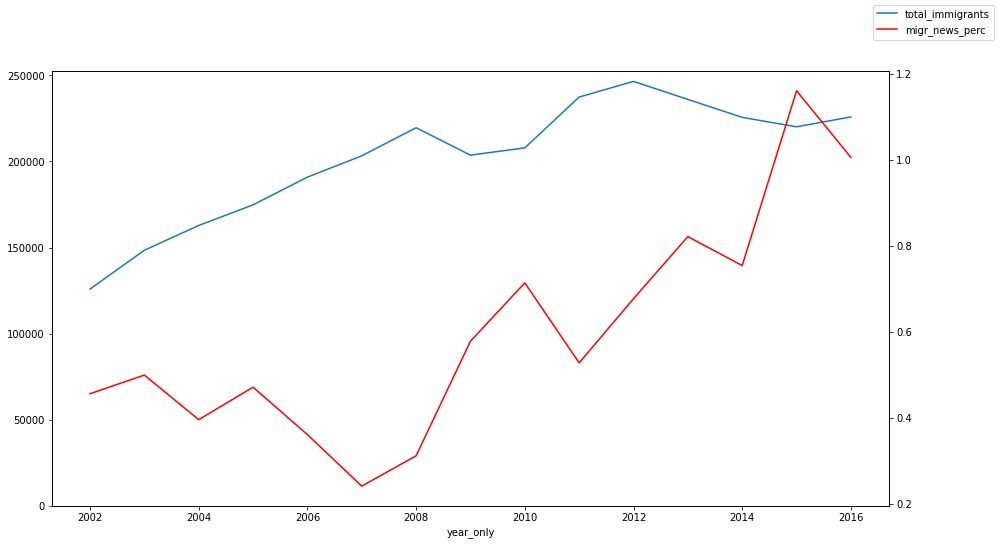

In [49]:
#plot
ax = immigr_merge.plot(x="year_only", y="total_immigrants", legend=False)
ax2 = ax.twinx()
immigr_merge.plot(x="year_only", y="migr_news_perc", ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
ax.set_ylim(bottom=0)
plt.show()

- both general upward trend
- but looks inverse: when there are less migration news stories, there are more immigrants, when there are more migration news stories, there are less immigrants
- or time lag? .. but of 2 years?
- don't know which one comes first:
    - are there a lot of immigrants, then a lot of news about immigrants? 
    - is there a lot of news about immigrants, followed by stricter policies/less immigrants? 
    - is there actually any correlation?
    

In [54]:
#regression
y = immigr_merge["migr_news_perc"]
X = immigr_merge[["const", 'total_immigrants']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

/Users/imogen/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         migr_news_perc   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3.354
Date:                Mon, 26 Oct 2020   Prob (F-statistic):             0.0901
Time:                        11:00:29   Log-Likelihood:                 1.2626
No. Observations:                  15   AIC:                             1.475
Df Residuals:                      13   BIC:                             2.891
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0749      0.372     -0.201      0.844      -0.880       0.730
total_immigrants  3.332e-06   1.82e-06      1.831      0.090   -5.99e-07    7.26e-06
==============================================================================
Omnibus:                        1.011   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.349
Skew:                           0.373   Prob(JB):                        0.840
Kurtosis:                       2.979   Cond. No.                     1.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R squared of 0.205 indicates weak positive correlation
- Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.090. Since this is above the Alpha level of 5%, it is statistically insignificant and we cannot reject the null hypothesis.

### 2. linear regression humanitarian stats & news 

In [59]:
humanit_merge

,Year,Refugee,Special Humanitarian Program,Special Assistance Category,Onshore,Total,year_only,percentage,financial_year,t,const
0,2002-07-01,3.996,7.212,0.0,911.000,12.119,2002,0.455606,2002-07-01,1,1
1,2003-07-01,3.851,8.912,0.0,784.000,13.547,2003,0.498948,2003-07-01,2,1
2,2004-07-01,5.289,6.684,0.0,952.000,12.925,2004,0.395300,2004-07-01,3,1
3,2005-07-01,5.699,6.739,0.0,1.247,13.685,2005,0.470755,2005-07-01,4,1
4,2006-07-01,5.924,5.157,0.0,1.707,12.788,2006,0.360467,2006-07-01,5,1
5,2007-07-01,5.951,4.721,0.0,1.932,12.604,2007,0.240773,2007-07-01,6,1
6,2008-07-01,6.446,4.471,0.0,2.495,13.412,2008,0.311291,2008-07-01,7,1
7,2009-07-01,5.988,3.234,0.0,4.535,13.757,2009,0.577675,2009-07-01,8,1
8,2010-07-01,5.998,2.973,0.0,4.828,13.799,2010,0.713295,2010-07-01,9,1
9,2011-07-01,6.004,714.000,0.0,7.041,13.759,2011,0.527310,2011-07-01,10,1


In [56]:
#add 't' column
humanit_merge = (humanit_merge
                .sort_values("Year")
                .assign(t=range(1, len(humanit_merge)+1)))


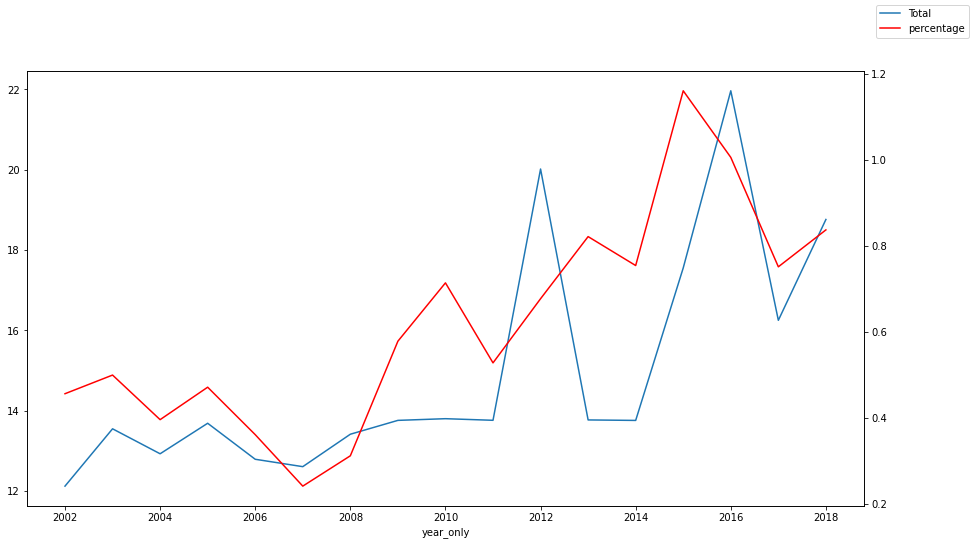

In [66]:
ax = humanit_merge.plot(x="year_only", y="Total", legend=False)
ax2 = ax.twinx()
humanit_merge.plot(x="year_only", y="percentage", 
                   ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

In [64]:
#add constant
humanit_merge = humanit_merge.assign(const=1)
#regression
y = humanit_merge["percentage"]
X = humanit_merge[["const", 'Total']] 
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     15.53
Date:                Mon, 26 Oct 2020   Prob (F-statistic):            0.00131
Time:                        11:13:14   Log-Likelihood:                 5.9586
No. Observations:                  17   AIC:                            -7.917
Df Residuals:                      15   BIC:                            -6.251
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3066      0.239     -1.280      0.220      -0.817       0.204
Total          0.0620      0.016      3.941      0.001       0.028       0.095
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.903
Skew:                           0.544   Prob(JB):                        0.637
Kurtosis:                       2.696   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R squared of 0.509 indicates weak-moderate positive correlation
- Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.001. Since this is below the Alpha level of 5%, it is statistically significant and we can reject the null hypothesis.

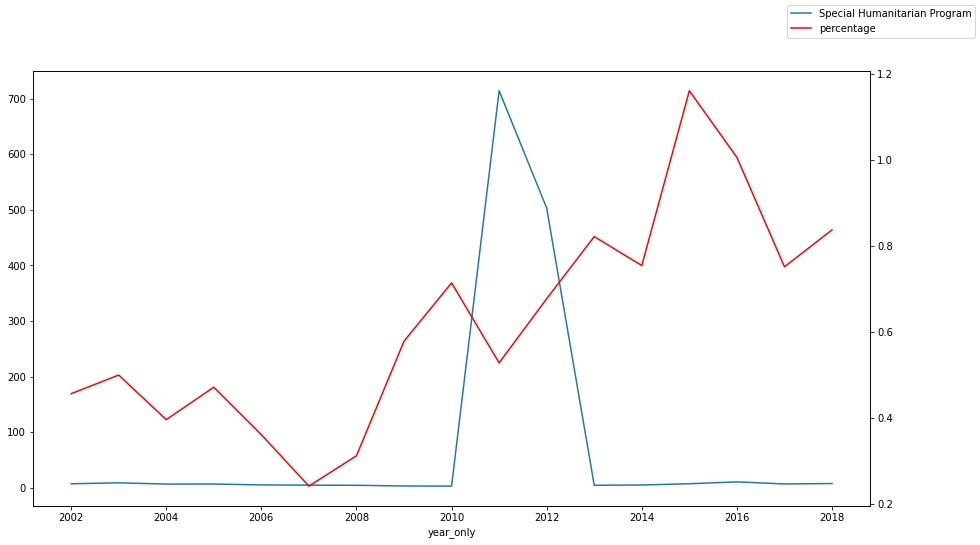

In [54]:
ax = humanit_merge.plot(x="year_only", y="Special Humanitarian Program", legend=False)
ax2 = ax.twinx()
humanit_merge.plot(x="year_only", y="percentage", 
                   ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

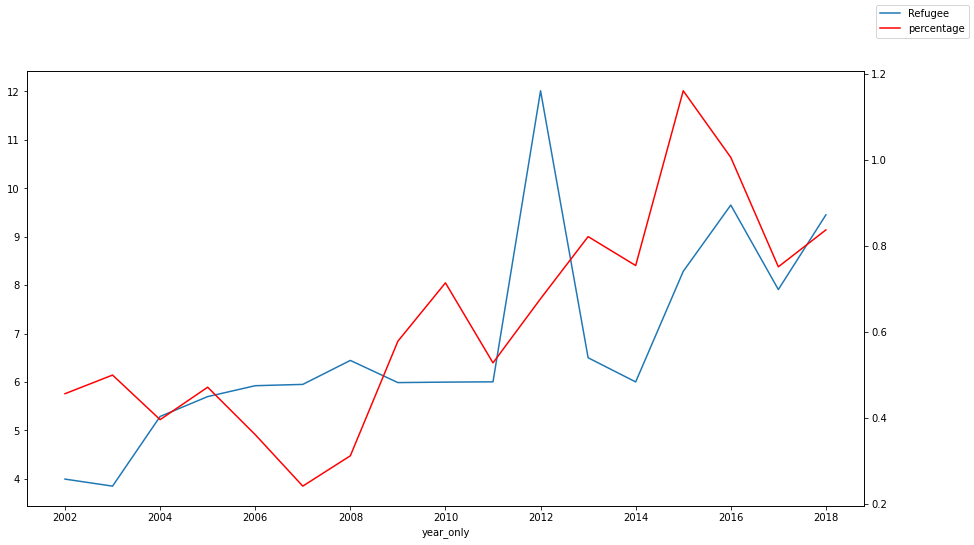

In [50]:
ax = humanit_merge.plot(x="year_only", y="Refugee", legend=False)
ax2 = ax.twinx()
humanit_merge.plot(x="year_only", y="percentage", 
                   ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

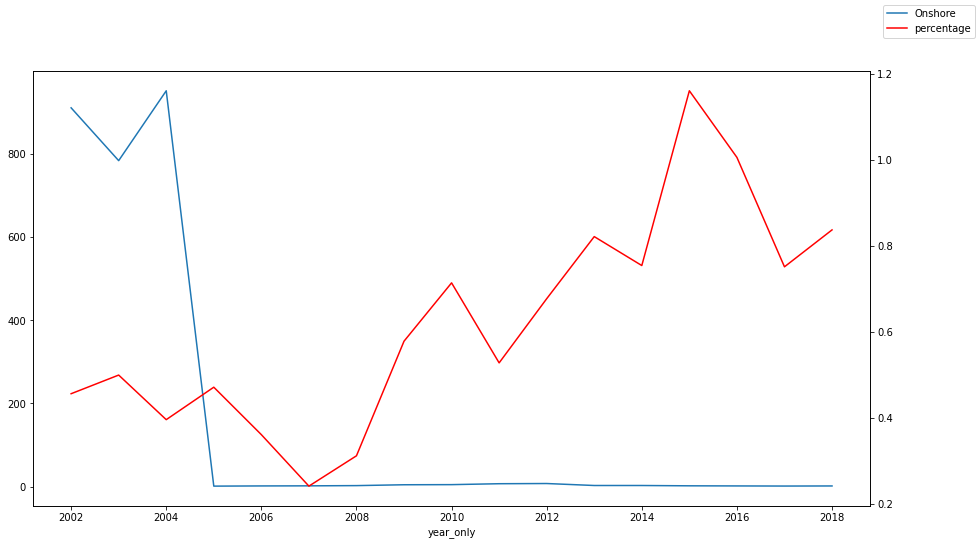

In [57]:
ax = humanit_merge.plot(x="year_only", y="Onshore", legend=False)
ax2 = ax.twinx()
humanit_merge.plot(x="year_only", y="percentage", 
                   ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

In [ ]:
ax = humanit_merge.plot(x="year_only", y="Refugee", legend=False)
ax2 = ax.twinx()
humanit_merge.plot(x="year_only", y="percentage", 
                   ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

In [52]:
#add constant
humanit_merge = humanit_merge.assign(const=1)
#regression
y = humanit_merge['percentage']
X = humanit_merge[["const", "t", 'Onshore']] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     14.74
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           0.000359
Time:                        12:41:16   Log-Likelihood:                 9.5497
No. Observations:                  17   AIC:                            -13.10
Df Residuals:                      14   BIC:                            -10.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1362      0.113      1.209      0.247      -0.105       0.378
t              0.0497      0.010      4.972      0.000       0.028       0.071
Onshore        0.0002      0.000      1.628      0.126   -7.51e-05       0.001
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.566
Skew:                           0.420   Prob(JB):                        0.753
Kurtosis:                       2.696   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#add constant
humanit_merge = humanit_merge.assign(const=1)
#regression
y = humanit_merge[""]
X = humanit_merge[["const", "t", 'percentage']] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

In [ ]:
#sum up the columns for each row
# make new totals column
#delete the 

In [41]:
humanit_merge

,Year,Refugee,Special Humanitarian Program,Special Assistance Category,Onshore,Total,year_only,percentage,financial_year,const,t
0,2002-07-01,3.996,7.212,0.0,911.000,12.119,2002,0.455606,2002-07-01,1,1
1,2003-07-01,3.851,8.912,0.0,784.000,13.547,2003,0.498948,2003-07-01,1,2
2,2004-07-01,5.289,6.684,0.0,952.000,12.925,2004,0.395300,2004-07-01,1,3
3,2005-07-01,5.699,6.739,0.0,1.247,13.685,2005,0.470755,2005-07-01,1,4
4,2006-07-01,5.924,5.157,0.0,1.707,12.788,2006,0.360467,2006-07-01,1,5
5,2007-07-01,5.951,4.721,0.0,1.932,12.604,2007,0.240773,2007-07-01,1,6
6,2008-07-01,6.446,4.471,0.0,2.495,13.412,2008,0.311291,2008-07-01,1,7
7,2009-07-01,5.988,3.234,0.0,4.535,13.757,2009,0.577675,2009-07-01,1,8
8,2010-07-01,5.998,2.973,0.0,4.828,13.799,2010,0.713295,2010-07-01,1,9
9,2011-07-01,6.004,714.000,0.0,7.041,13.759,2011,0.527310,2011-07-01,1,10


In [ ]:
#deving_merge['Central Asia']

In [ ]:
#subregion = migration_copy.groupby('sub-region').sum()

In [ ]:
'''subregion = migration_copy.groupby('sub-region').sum()
migration['2008–09'].sum()
numbers_per_year = [migration.sum(numeric_only=True)]
df = pd.DataFrame (numbers_per_year)
df = df.T # transpose
df'''

In [89]:
deving_merge

,financial_year,Central Asia,North Africa & the Middle East,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Sub-Saharan Africa,year_only,t,total_immigrants,percentage
0,2002-07-01,1099.0,11440.0,1955.0,21037.0,12910.0,10907.0,2002,1,125870.0,0.455606
1,2003-07-01,1410.0,12203.0,2166.0,22881.0,16662.0,13521.0,2003,2,148431.0,0.498948
2,2004-07-01,1697.0,13797.0,2392.0,23685.0,19692.0,14102.0,2004,3,162801.0,0.395300
3,2005-07-01,2767.0,12057.0,2677.0,24463.0,22506.0,12979.0,2005,4,174782.0,0.470755
4,2006-07-01,2460.0,10845.0,2585.0,26192.0,28476.0,14564.0,2006,5,190864.0,0.360467
5,2007-07-01,1980.0,9828.0,3046.0,28050.0,33002.0,15140.0,2007,6,203238.0,0.240773
6,2008-07-01,1883.0,12558.0,3362.0,29994.0,36024.0,19975.0,2008,7,219547.0,0.311291
7,2009-07-01,1770.0,9936.0,4086.0,30196.0,34761.0,20658.0,2009,8,203647.0,0.577675
8,2010-07-01,2095.0,11137.0,3479.0,30907.0,33828.0,16353.0,2010,9,207855.0,0.713295
9,2011-07-01,1697.0,11239.0,4121.0,34324.0,43190.0,16879.0,2011,10,237371.0,0.527310


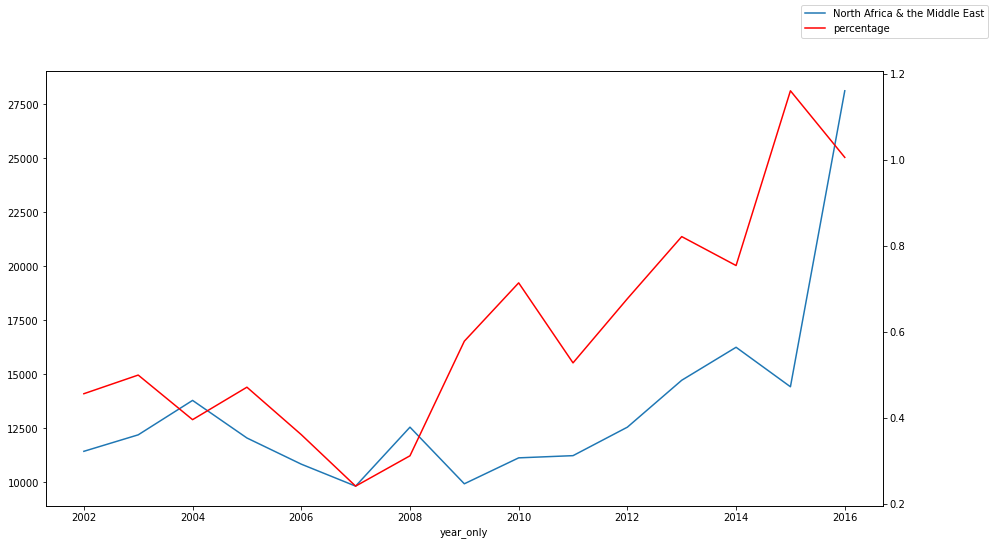

In [92]:
ax = deving_merge.plot(x="year_only", y="North Africa & the Middle East", legend=False)
ax2 = ax.twinx()
deving_merge.plot(x="year_only", y="percentage", ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

above looks like a very close fit, but regression is not statistically significant.

In [113]:
#add constant
deving_merge = deving_merge.assign(const=1)
#regression
y = deving_merge["North Africa & the Middle East"]
X = deving_merge[["const", "t", 'percentage']] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     North Africa & the Middle East   R-squared:                       0.392
Model:                                        OLS   Adj. R-squared:                  0.291
Method:                             Least Squares   F-statistic:                     3.871
Date:                            Mon, 05 Oct 2020   Prob (F-statistic):             0.0504
Time:                                    17:44:07   Log-Likelihood:                -143.06
No. Observations:                              15   AIC:                             292.1
Df Residuals:                                  12   BIC:                             294.2
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7184.4804   2516.807      2.855      0.014    1700.829    1.27e+04
t            234.8483    373.156      0.629      0.541    -578.189    1047.886
percentage  7270.7574   6462.194      1.125      0.283   -6809.153    2.14e+04
==============================================================================
Omnibus:                       14.497   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.437
Skew:                           1.559   Prob(JB):                      0.00328
Kurtosis:                       5.929   Cond. No.                         62.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#add constant
deving_merge = deving_merge.assign(const=1)
#regression
y = deving_merge['percentage']
X = deving_merge[["const", "t", "North Africa & the Middle East"]] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     12.38
Date:                Mon, 05 Oct 2020   Prob (F-statistic):            0.00121
Time:                        17:32:04   Log-Likelihood:                 7.9377
No. Observations:                  15   AIC:                            -9.875
Df Residuals:                      12   BIC:                            -7.751
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1124      0.135      0.834      0.420      -0.181       0.406
t                                  0.0387      0.012      3.329      0.006       0.013       0.064
North Africa & the Middle East  1.312e-05   1.17e-05      1.125      0.283   -1.23e-05    3.85e-05
==============================================================================
Omnibus:                        0.541   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.185
Skew:                           0.261   Prob(JB):                        0.912
Kurtosis:                       2.846   Cond. No.                     4.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

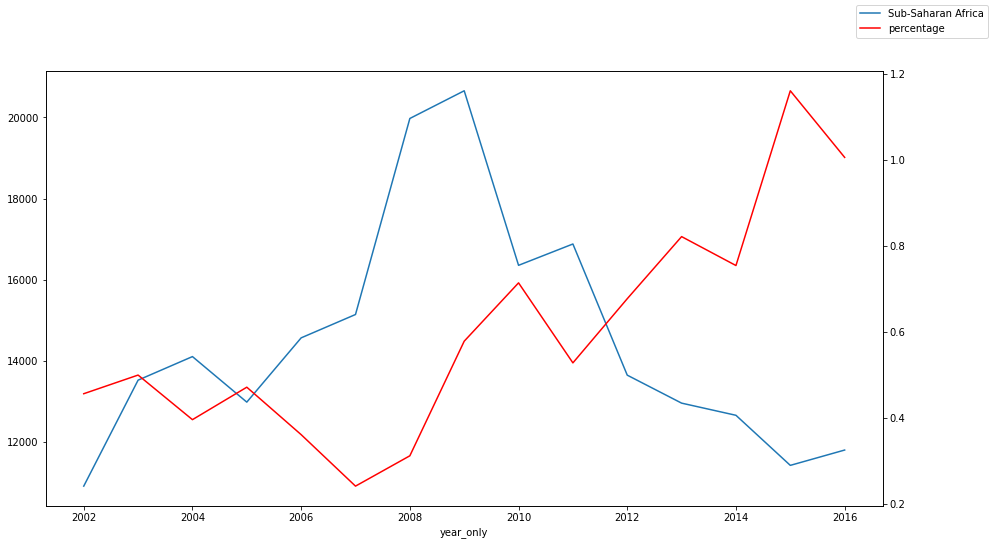

In [115]:
ax = deving_merge.plot(x="year_only", y="Sub-Saharan Africa", legend=False)
ax2 = ax.twinx()
deving_merge.plot(x="year_only", y="percentage", ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

In [114]:
#add constant
deving_merge = deving_merge.assign(const=1)
#regression
y = deving_merge['percentage']
X = deving_merge[["const", "t", "Sub-Saharan Africa"]] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           0.000146
Time:                        17:44:46   Log-Likelihood:                 10.579
No. Observations:                  15   AIC:                            -15.16
Df Residuals:                      12   BIC:                            -13.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7153      0.199      3.586      0.004       0.281       1.150
t                      0.0442      0.008      5.515      0.000       0.027       0.062
Sub-Saharan Africa  -3.25e-05   1.24e-05     -2.620      0.022   -5.95e-05   -5.48e-06
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.218
Skew:                          -0.055   Prob(JB):                        0.897
Kurtosis:                       2.420   Cond. No.                     8.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Visually looks like a strong correlation between news stories on immigrants and immigration from MENA region, but not statistically significant

In [103]:
region_merge

,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t,total_immigrants,percentage
0,2002-07-01,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1,125870.0,0.455606
1,2003-07-01,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2,148431.0,0.498948
2,2004-07-01,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3,162801.0,0.395300
3,2005-07-01,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4,174782.0,0.470755
4,2006-07-01,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5,190864.0,0.360467
5,2007-07-01,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6,203238.0,0.240773
6,2008-07-01,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7,219547.0,0.311291
7,2009-07-01,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8,203647.0,0.577675
8,2010-07-01,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9,207855.0,0.713295
9,2011-07-01,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10,237371.0,0.527310


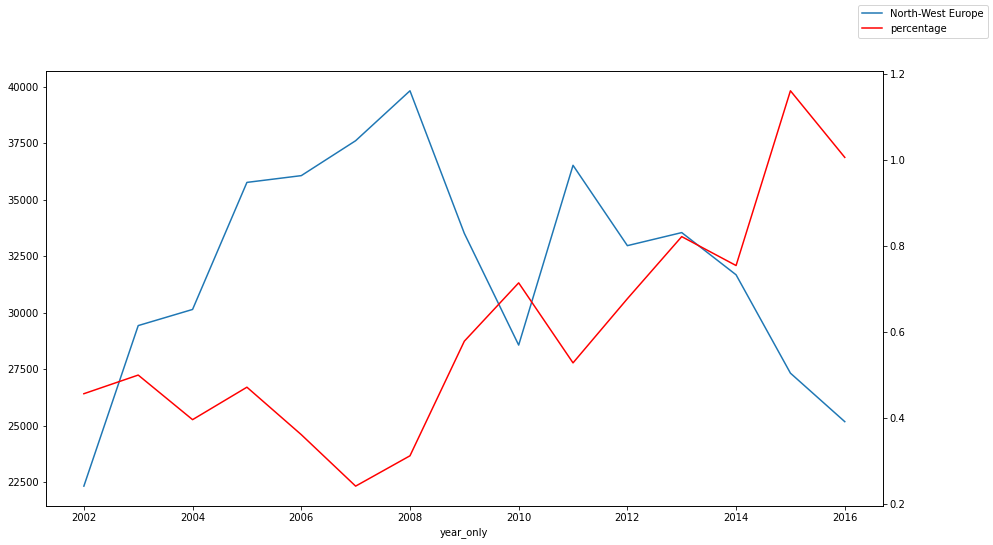

In [105]:
ax = region_merge.plot(x="year_only", y="North-West Europe", legend=False)
ax2 = ax.twinx()
region_merge.plot(x="year_only", y="percentage", ax=ax2, legend=False, color="r", figsize=(15,8))
ax.figure.legend()
plt.show()

In [112]:
#add constant
region_merge = region_merge.assign(const=1)
#regression
y = region_merge['percentage']
X = region_merge[["const", "t", 'North-West Europe']] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.59e-06
Time:                        17:40:52   Log-Likelihood:                 15.622
No. Observations:                  15   AIC:                            -25.24
Df Residuals:                      12   BIC:                            -23.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0790      0.178      6.063      0.000       0.691       1.467
t                     0.0446      0.006      7.807      0.000       0.032       0.057
North-West Europe -2.617e-05   5.24e-06     -4.996      0.000   -3.76e-05   -1.48e-05
==============================================================================
Omnibus:                        1.818   Durbin-Watson:                   2.720
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.417
Skew:                           0.678   Prob(JB):                        0.492
Kurtosis:                       2.343   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Strong and statistically significant correlation with North_west Europe

In [110]:
#add constant
region_merge = region_merge.assign(const=1)
#regression
y = region_merge['percentage']
X = region_merge[["const", "t", "North Africa & the Middle East", 'Central Asia', 
                  'Southern Asia', 'Sub-Saharan Africa', 'North East Asia']] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     8.504
Date:                Mon, 05 Oct 2020   Prob (F-statistic):            0.00403
Time:                        17:40:03   Log-Likelihood:                 14.530
No. Observations:                  15   AIC:                            -15.06
Df Residuals:                       8   BIC:                            -10.10
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.3568      0.417      3.251      0.012       0.395       2.319
t                                  0.1456      0.045      3.269      0.011       0.043       0.248
North Africa & the Middle East   -1.3e-05   1.22e-05     -1.063      0.319   -4.12e-05    1.52e-05
Central Asia                    3.187e-05    6.1e-05      0.523      0.615      -0.000       0.000
Southern Asia                  -2.156e-05   1.11e-05     -1.950      0.087   -4.71e-05    3.93e-06
Sub-Saharan Africa             -2.409e-05   1.68e-05     -1.433      0.190   -6.29e-05    1.47e-05
North East Asia                -2.141e-05   1.69e-05     -1.267      0.241   -6.04e-05    1.76e-05
==============================================================================
Omnibus:                        1.737   Durbin-Watson:                   2.519
Prob(Omnibus):                  0.420   Jarque-Bera (JB):                1.263
Skew:                          -0.668   Prob(JB):                        0.532
Kurtosis:                       2.515   Cond. No.                     7.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### dev'ing countries seem to be not statistically significant?

In [109]:
region_merge.columns

Index(['financial_year', 'Central Asia', 'North Africa & the Middle East',
       'North East Asia', 'North-West Europe', 'Northern America', 'Oceania',
       'South America, Central America & the Caribbean', 'South East Asia',
       'Southern Asia', 'Southern and Eastern Europe', 'Sub-Saharan Africa',
       'year_only', 't', 'total_immigrants', 'percentage', 'const'],
      dtype='object')

In [111]:
#add constant
region_merge = region_merge.assign(const=1)
#regression
y = region_merge['percentage']
X = region_merge[["const", "t", 'North-West Europe']] #t represents time
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.59e-06
Time:                        17:40:25   Log-Likelihood:                 15.622
No. Observations:                  15   AIC:                            -25.24
Df Residuals:                      12   BIC:                            -23.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0790      0.178      6.063      0.000       0.691       1.467
t                     0.0446      0.006      7.807      0.000       0.032       0.057
North-West Europe -2.617e-05   5.24e-06     -4.996      0.000   -3.76e-05   -1.48e-05
==============================================================================
Omnibus:                        1.818   Durbin-Watson:                   2.720
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.417
Skew:                           0.678   Prob(JB):                        0.492
Kurtosis:                       2.343   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
merged

,financial_year,total_immigrants,migr_news_perc,year_only,t,const
0,2002-07-01,125870.0,0.455606,2002,1,1
1,2003-07-01,148431.0,0.498948,2003,2,1
2,2004-07-01,162801.0,0.395300,2004,3,1
3,2005-07-01,174782.0,0.470755,2005,4,1
4,2006-07-01,190864.0,0.360467,2006,5,1
5,2007-07-01,203238.0,0.240773,2007,6,1
6,2008-07-01,219547.0,0.311291,2008,7,1
7,2009-07-01,203647.0,0.577675,2009,8,1
8,2010-07-01,207855.0,0.713295,2010,9,1
9,2011-07-01,237371.0,0.527310,2011,10,1


### Make subset of developing country regions

In [74]:
subregion_deving = subregion[['financial_year', 'Central Asia', 'North Africa & the Middle East',
                              'South America, Central America & the Caribbean', 'South East Asia',
                              'Southern Asia', 'Sub-Saharan Africa', 'year_only', 't', 'total_immigrants']]

In [75]:
subregion_deving

,financial_year,Central Asia,North Africa & the Middle East,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Sub-Saharan Africa,year_only,t,total_immigrants
0,2002-07-01,1099.0,11440.0,1955.0,21037.0,12910.0,10907.0,2002,1,125870.0
1,2003-07-01,1410.0,12203.0,2166.0,22881.0,16662.0,13521.0,2003,2,148431.0
2,2004-07-01,1697.0,13797.0,2392.0,23685.0,19692.0,14102.0,2004,3,162801.0
3,2005-07-01,2767.0,12057.0,2677.0,24463.0,22506.0,12979.0,2005,4,174782.0
4,2006-07-01,2460.0,10845.0,2585.0,26192.0,28476.0,14564.0,2006,5,190864.0
5,2007-07-01,1980.0,9828.0,3046.0,28050.0,33002.0,15140.0,2007,6,203238.0
6,2008-07-01,1883.0,12558.0,3362.0,29994.0,36024.0,19975.0,2008,7,219547.0
7,2009-07-01,1770.0,9936.0,4086.0,30196.0,34761.0,20658.0,2009,8,203647.0
8,2010-07-01,2095.0,11137.0,3479.0,30907.0,33828.0,16353.0,2010,9,207855.0
9,2011-07-01,1697.0,11239.0,4121.0,34324.0,43190.0,16879.0,2011,10,237371.0


### Make subset of developed country regions

In [76]:
subregion_devd = subregion[['financial_year', 'North-West Europe', 
                            'Northern America', 'Oceania', 
                            'Southern and Eastern Europe', 'North East Asia',  
                            'year_only', 't', 'total_immigrants']]

In [77]:
subregion_devd

,financial_year,North-West Europe,Northern America,Oceania,Southern and Eastern Europe,North East Asia,year_only,t,total_immigrants
0,2002-07-01,22324.0,3670.0,16775.0,6669.0,17084.0,2002,1,125870.0
1,2003-07-01,29428.0,4012.0,19131.0,5846.0,21171.0,2003,2,148431.0
2,2004-07-01,30142.0,4128.0,22263.0,5561.0,25342.0,2004,3,162801.0
3,2005-07-01,35764.0,4410.0,23963.0,5656.0,27540.0,2005,4,174782.0
4,2006-07-01,36063.0,4201.0,28392.0,5502.0,31584.0,2006,5,190864.0
5,2007-07-01,37608.0,4332.0,33308.0,5772.0,31172.0,2007,6,203238.0
6,2008-07-01,39818.0,4619.0,32515.0,6190.0,32609.0,2008,7,219547.0
7,2009-07-01,33508.0,4802.0,24685.0,6079.0,33166.0,2009,8,203647.0
8,2010-07-01,28565.0,4471.0,34060.0,5813.0,37147.0,2010,9,207855.0
9,2011-07-01,36520.0,4963.0,42925.0,6808.0,34705.0,2011,10,237371.0


In [90]:
deving_merge = subregion_deving.merge(news_perc, left_on='financial_year', right_on='financial_year', copy = False)

NameError: name 'subregion_deving' is not defined

In [91]:
deving_merge

NameError: name 'deving_merge' is not defined